In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228827136/228813984 [==============================] - 3s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [ ]:
rose = list(data_dir.glob('roses/*'))
rose[:5]

[PosixPath('datasets/flower_photos/roses/5212885371_fe27c406a2_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9609569441_eeb8566e94.jpg'),
 PosixPath('datasets/flower_photos/roses/15094168139_8f636ffa1d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4093390305_4010c736c9.jpg'),
 PosixPath('datasets/flower_photos/roses/7865295712_bcc94d120c.jpg')]

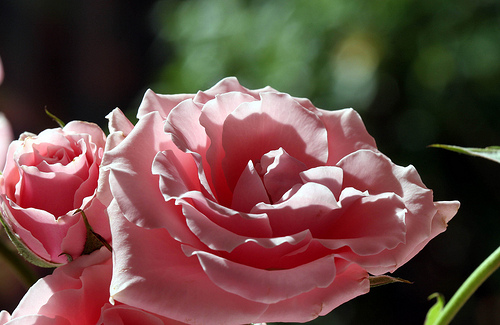

In [ ]:
PIL.Image.open(str(rose[3]))
 



In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_labels_dict

{'daisy': 1, 'dandelion': 2, 'roses': 0, 'sunflowers': 3, 'tulips': 4}

In [ ]:
str(flowers_images_dict['roses'][2])

'datasets/flower_photos/roses/15094168139_8f636ffa1d_n.jpg'

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][2]))  # just cnt to numpy
img

array([[[ 50,  57,  54],
        [ 50,  57,  54],
        [ 52,  59,  56],
        ...,
        [ 49,  56,  59],
        [ 65,  61,  72],
        [ 90,  92, 103]],

       [[ 47,  54,  51],
        [ 49,  56,  53],
        [ 51,  58,  55],
        ...,
        [ 68,  79,  77],
        [ 51,  54,  59],
        [ 52,  57,  66]],

       [[ 45,  50,  48],
        [ 48,  53,  52],
        [ 50,  55,  53],
        ...,
        [ 92, 110, 103],
        [ 59,  67,  67],
        [ 42,  51,  55]],

       ...,

       [[ 31,  79,  61],
        [ 36,  81,  62],
        [ 44,  83,  62],
        ...,
        [  0,   0,   6],
        [  0,   7,  17],
        [ 30,  48,  59]],

       [[ 20,  72,  54],
        [ 30,  76,  57],
        [ 39,  80,  59],
        ...,
        [  5,  29,  35],
        [ 22,  51,  60],
        [ 52,  80,  91]],

       [[ 12,  67,  50],
        [ 23,  73,  55],
        [ 35,  77,  59],
        ...,
        [ 34,  75,  78],
        [ 58,  94, 104],
        [ 70,  99, 113]]

In [ ]:
for flower_name, images in flowers_images_dict.items():
  print(flower_name)
  print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [ ]:
x,y = [],[]
for flower_name, images in flowers_images_dict.items():
   for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
x = np.array(x)
y = np.array(y)



In [ ]:
y[3050]

4

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# Data Aug


In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

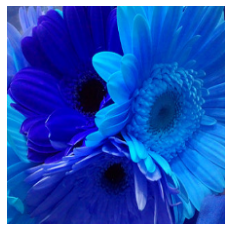

In [ ]:

plt.axis('off')
plt.imshow(x[0])

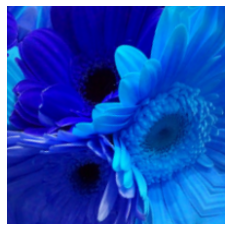

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=40)

Epoch 1/40
86/86 [==============================] - 7s 64ms/step - loss: 1.3431 - accuracy: 0.4310
Epoch 2/40
86/86 [==============================] - 5s 64ms/step - loss: 1.0732 - accuracy: 0.5636
Epoch 3/40
86/86 [==============================] - 5s 64ms/step - loss: 0.9414 - accuracy: 0.6334
Epoch 4/40
86/86 [==============================] - 6s 64ms/step - loss: 0.8728 - accuracy: 0.6664
Epoch 5/40
86/86 [==============================] - 6s 64ms/step - loss: 0.8133 - accuracy: 0.6879
Epoch 6/40
86/86 [==============================] - 5s 64ms/step - loss: 0.7596 - accuracy: 0.7155
Epoch 7/40
86/86 [==============================] - 5s 63ms/step - loss: 0.7102 - accuracy: 0.7202
Epoch 8/40
86/86 [==============================] - 6s 64ms/step - loss: 0.6669 - accuracy: 0.7489
Epoch 9/40
86/86 [==============================] - 6s 64ms/step - loss: 0.6400 - accuracy: 0.7500
Epoch 10/40
86/86 [==============================] - 6s 65ms/step - loss: 0.5979 - accuracy: 0.7794
Epoch 11/

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 32ms/step - loss: 1.7357 - accuracy: 0.7004


[1.735650658607483, 0.7004357576370239]

In [1]:
model.summary()

NameError: ignored

# transfer learning


In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [ ]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 11s 79ms/step - loss: 0.8179 - acc: 0.6940
Epoch 2/5
86/86 [==============================] - 7s 79ms/step - loss: 0.4127 - acc: 0.8583
Epoch 3/5
86/86 [==============================] - 7s 78ms/step - loss: 0.3291 - acc: 0.8946
Epoch 4/5
86/86 [==============================] - 7s 79ms/step - loss: 0.2711 - acc: 0.9161
Epoch 5/5
86/86 [==============================] - 7s 78ms/step - loss: 0.2341 - acc: 0.9317


In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 3s 96ms/step - loss: 0.3780 - acc: 0.8638


[0.378047913312912, 0.8638344407081604]